In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

**Question 6:**

Get the data set “from sklearn.datasets import load_iris”. Perform a 5-fold Cross-validation to observe the best polynomial order (among orders 1 to 10 and without regularization) for validation prediction. Note that, you will have to partition the whole dataset for training/validation/test parts, where the size of validation set is the same as that of test. Provide a plot of the average 5-fold training and validation error rates over the polynomial orders. The randomly partitioned data sets of the 5-fold shall be maintained for reuse in evaluation of future algorithms.

In [2]:
##--- load data from scikit ---##
iris_dataset = load_iris()
X = np.array(iris_dataset['data'])
y = np.array(iris_dataset['target'])

In [3]:
# 25 for testing, 25 for validation, 100 for training
len(y)

150

In [4]:
# one-hot encoding (tut 6)
Y = list()
for i in y:
  letter = [0, 0, 0]
  letter[i] = 1 # classes: 0, 1, 2
  Y.append(letter)
Y = np.array(Y)
test_Idx = np.random.RandomState(seed=2).permutation(Y.shape[0])
X_test = X[test_Idx[:25]]
Y_test = Y[test_Idx[:25]]
X = X[test_Idx[25:]]
Y = Y[test_Idx[25:]]

In [70]:
## one-hot encoding by library (tut 6)
# onehot_encoder=OneHotEncoder(sparse_output=False)
# reshaped = y.reshape(len(y), 1)
# Y = onehot_encoder.fit_transform(reshaped)

In [76]:
## train test split by library
# X, X_test, Y, Y_test = train_test_split(X, Y, test_size=1/6, random_state=0)

In [5]:
error_rate_train_array = []
error_rate_val_array = []
##--- Loop for Polynomial orders 1 to 10 ---##
for order in range(1,11):
  error_rate_train_array_fold = []
  error_rate_val_array_fold = []
  # Random permutation of data
  Idx = np.random.RandomState(seed=8).permutation(Y.shape[0])
  # Loop 5 times for 5-fold
  for k in range(0,5):
    ##--- Prepare training, validation, and test data for the 5-fold ---#
    # Prepare indexing for each fold
    X_val = X[Idx[k*25:(k+1)*25]]
    Y_val = Y[Idx[k*25:(k+1)*25]]
    Idxtrn = np.setdiff1d(Idx, Idx[k*25:(k+1)*25])
    X_train = X[Idxtrn]
    Y_train = Y[Idxtrn]
    ##--- Polynomial Classification ---## (tut 6)
    poly = PolynomialFeatures(order)
    P = poly.fit_transform(X_train)
    Pval = poly.fit_transform(X_val)
    if P.shape[0] >= P.shape[1]: # over-/under-determined cases (tut 4)
      reg_L = 0.1*np.identity(P.shape[1])
      wp = np.linalg.inv(P.T @ P + reg_L) @ P.T @ (Y_train)
    else:
      reg_R = 0.1*np.identity(P.shape[0])
      wp = P.T @ np.linalg.inv(P @ P.T + reg_R) @ Y_train
    ##--- trained output ---## (tut 6)
    y_est_p = P.dot(wp);
    y_cls_p = [[1 if y == max(x) else 0 for y in x] for x in y_est_p ]
    m1tr = np.matrix(Y_train)
    m2tr = np.matrix(y_cls_p)
    # training classification error count and rate computation (tut 6)
    difference = np.abs(m1tr - m2tr)
    error_train = np.where(difference.any(axis=1))[0]
    error_rate_train = len(error_train)/len(difference)
    error_rate_train_array_fold += [error_rate_train]
    ##--- validation output ---##
    yval_est_p = Pval.dot(wp);
    yval_cls_p = [[1 if y == max(x) else 0 for y in x] for x in yval_est_p ]
    m1 = np.matrix(Y_val)
    m2 = np.matrix(yval_cls_p)
    # validation classification error count and rate computation
    difference = np.abs(m1 - m2)
    error_val = np.where(difference.any(axis=1))[0]
    error_rate_val = len(error_val)/len(difference)
    error_rate_val_array_fold += [error_rate_val]
  # store results for each polynomial order
  error_rate_train_array += [np.mean(error_rate_train_array_fold)]
  error_rate_val_array += [np.mean(error_rate_val_array_fold)]

In [ ]:
## K-fold library
# KFold(n_splits=5, random_state=0, shuffle=True)

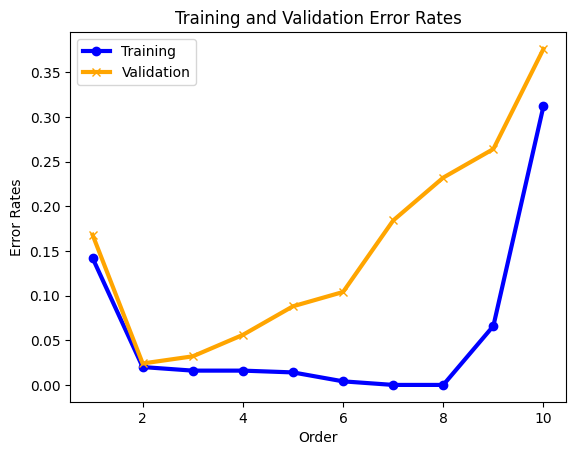

In [6]:
##--- plotting ---##
import matplotlib.pyplot as plt
order=[x for x in range(1,11)]
plt.plot(order, error_rate_train_array, color='blue', marker='o', linewidth=3, label='Training')
plt.plot(order, error_rate_val_array, color='orange', marker='x', linewidth=3, label='Validation')
plt.xlabel('Order')
plt.ylabel('Error Rates')
plt.title('Training and Validation Error Rates')
plt.legend()
plt.show()